In [8]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

## Linear Equation

Gaussian elimination. Implement it. Do it once in your life. The use `np.linalg.solve` for the rest.

In [26]:
A = np.array([
    [1., 1., 1.],
    [2., 3., 4.],
    [1., -1., 5.]
])

B = np.array([6. , 20., 14.])

def forward(A, B):
    A = A.copy()
    B = B.copy()
    n_row, n_column = A.shape
    
    for pivot_row in range(0, n_row-1):
        for row_to_elim in range(pivot_row+1, n_row):
            p = pivot_row
            coeff = A[ row_to_elim, p]/A[p, p]
            A[row_to_elim] = A[row_to_elim] - coeff*A[p]
            B[row_to_elim] = B[row_to_elim] - coeff*B[p]
    
    return A, B

forward(A, B)

def backward_sub(A, B): # upper_a, upper_b
    A = A.copy()
    B = B.copy()
    n_row, n_column = A.shape
    
    for pivot_row in range(n_row-1, 0, -1):
        pivot_elem = A[pivot_row, pivot_row]
        A[pivot_row] = A[pivot_row]/pivot_elem
        B[pivot_row] = B[pivot_row]/pivot_elem
        for row_to_elim in range(0, pivot_row):
            coeff = A[row_to_elim, pivot_row]
            A[row_to_elim] = A[row_to_elim] - coeff*A[pivot_row]
            B[row_to_elim] = B[row_to_elim] - coeff*B[pivot_row]

    pv = A[0,0]
    A[0] = A[0]/pv
    B[0] = B[0]/pv

    return A, B

def gaussian_elim(A, B):
    A, B = forward(A, B)
    A, B = backward_sub(A, B)
    return B



In [27]:
n=100
A = np.random.random((n,n))
B = np.random.random(n)

x = gaussian_elim(A, B)


In [28]:
A @ x - B

array([ 8.41859915e-12,  7.20756788e-13,  1.59485758e-11,  4.55172566e-11,
        3.08729708e-11,  2.38827846e-11,  3.01089154e-11,  2.12861950e-11,
        1.78194126e-11,  2.59944288e-11,  4.99035258e-11,  1.30624400e-11,
       -1.12904130e-11,  4.12839762e-11,  1.18528520e-11,  2.34452457e-11,
        2.27925456e-11,  6.15723028e-11,  4.64095429e-11,  1.88185023e-11,
        2.05104822e-11, -2.92054159e-11,  1.78164150e-11,  4.42661463e-11,
        9.57367519e-12,  4.79052353e-11,  1.10874643e-11,  2.84723356e-11,
        2.25249819e-11,  3.89623889e-11,  3.43243212e-11, -5.79181147e-12,
        2.95053981e-11,  4.72438755e-11,  2.19021468e-11,  1.56327173e-11,
        3.08063575e-11,  5.46558354e-11,  1.09420251e-11,  2.59076094e-11,
        3.27720073e-11,  5.70077319e-12,  2.54580801e-11,  2.64390732e-11,
       -1.14015464e-11,  4.78603823e-11,  3.57408547e-11, -1.23274724e-11,
        4.13247214e-12,  2.93295388e-11,  1.87061477e-12,  3.00705016e-11,
        1.65309988e-11,  

### Linear Regression

    1) Load the linear data using `np.loadtxt`. The first column is `x` and the second column is `y`.

In [29]:
import pandas as pd
import os
data_x, data_y = np.loadtxt("linear.txt")



2) Plot `data_x` vs `data_y`

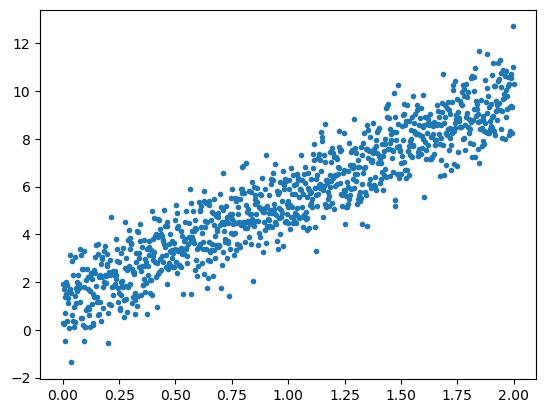

In [12]:
plt.plot(data_x, data_y, '.')

3) What what is the equation for a striaght line?

In [13]:
# y = mx+ c

4) What is the difference between a "good line" and a "bad line"?

In [20]:
# Sum of error away from all points should my optimum minimum.

(1000,)

5) What are we trying to adjust to minimize the $\chi^2$?

4.308054374604932 1.195809159619785


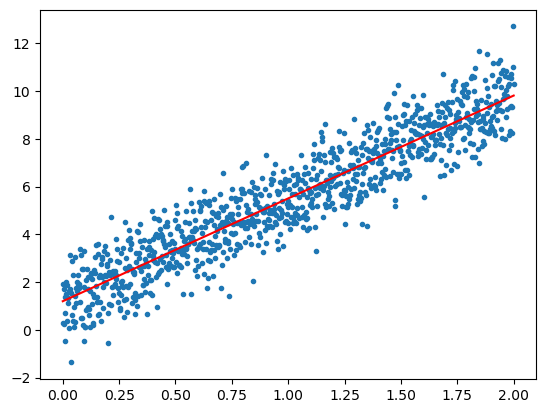

In [31]:
# ax^2 + bx + c

def best_line(xs, ys): # -> (a, b):
    def sx(nx):
        return np.sum(xs**nx)
    
    def sxy(nx):
        return np.sum(ys*xs**nx)
    
    A = np.array([
        [sx(2), sx(1)],
        [sx(1), sx(0)]
    ])
    B = np.array([sxy(1), sxy(0)])
    return gaussian_elim(A, B)

a, b = best_line(data_x, data_y)
print(a, b)
plt.plot(data_x, data_y, '.')
xs = np.linspace(0,2, 100)
plt.plot(xs, a*xs+b, '-r')

6) How do we findind the minimum of $\chi^2$? Whare are they?

In [ ]:
# slope is 0

7) Find the best slope and the best intercept.

In [ ]:
#?

8) Plot the line along with the data point to verify that you actually got the right answer.

In [ ]:
#

9) What is your prediction for the value of `y` when `x`=3.0?

In [ ]:
#

### Generalization

The technique we learn above of finding the parameter that minimize the $\chi^2$ does not limit you to just a straight line model. Let us use it for a more general problem.

1) Open parabola.txt and plot it. Again the first column is `x` and second column is `y`.

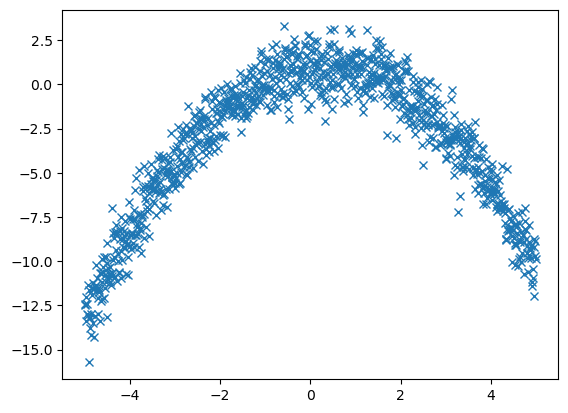

In [33]:
data_x, data_y = np.loadtxt('parabola.txt')
plt.plot(data_x, data_y,'x')

2) What is the general form for parabola?


-0.5049351618447857 0.3058587336411376 0.9766805557453936


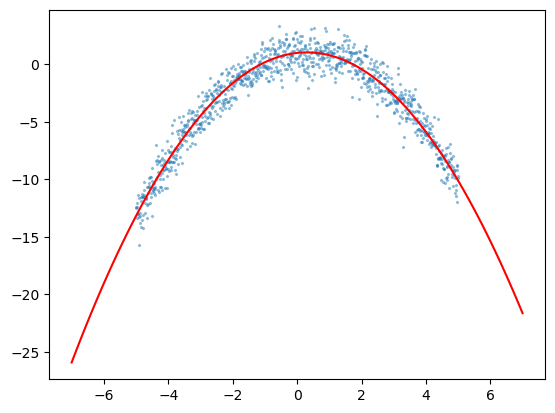

In [38]:
def fit(xs, ys):
    def s(nx, ny):
        return sum(xs**nx * ys**ny)
    
    n = len(xs)
    A = np.array([
        [s(4, 0), s(3, 0), s(2, 0)], 
        [s(3, 0), s(2, 0), s(1, 0)], 
        [s(2, 0), s(1, 0), s(0, 0)]
    ])
    B = np.array([s(2, 1), s(1, 1), s(0, 1)])
    a, b, c = gaussian_elim(A, B)
    return a, b, c

a, b, c = fit(data_x, data_y)
print(a, b, c)
xs = np.linspace(-7, 7, 100)
plt.scatter(data_x, data_y, alpha=0.5, s=2, marker='x')
plt.plot(xs, a*xs**2 + b*xs+c, 'r')


3) What is the difference between a "good line" and a "bad line"?

4) What are we trying to minimize in order to find the best parabola?

5) Find the best fitted parabola and plot to verify.

-0.5049351618447857 0.3058587336411376 0.9766805557453936


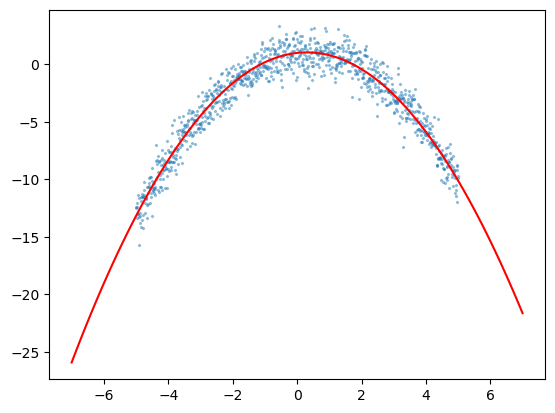

In [39]:
def fit(xs, ys):
    def s(nx, ny):
        return sum(xs**nx * ys**ny)
    
    n = len(xs)
    A = np.array([
        [s(4, 0), s(3, 0), s(2, 0)], 
        [s(3, 0), s(2, 0), s(1, 0)], 
        [s(2, 0), s(1, 0), s(0, 0)]
    ])
    B = np.array([s(2, 1), s(1, 1), s(0, 1)])
    a, b, c = gaussian_elim(A, B)
    return a, b, c

a, b, c = fit(data_x, data_y)
print(a, b, c)
xs = np.linspace(-7, 7, 100)
plt.scatter(data_x, data_y, alpha=0.5, s=2, marker='x')
plt.plot(xs, a*xs**2 + b*xs+c, 'r')


# Higher Dimension.

Also, there is no need to stop at 2 dimension.

In [40]:
np.random.seed(1234567)
def gen_child_height_sample(n_data=100):
    father_height = np.random.randn(n_data)*20 + 170
    mother_height = np.random.randn(n_data)*20 + 160
    # just pretend you didn't see this
    child_height = 0.8*mother_height + 0.2*father_height + 5 + np.random.randn(n_data)*10
    return father_height, mother_height, child_height

father_height, mother_height, child_height = gen_child_height_sample()


We have a reason to believe that a child height is a linear combination of mother's and father's height.

$$
h_{child} = c_{mom} \times h_{mom} + c_{dad} \times h_{dad} + h_0
$$

1.) Plot mother_height vs child_height and father_height vs child_height.

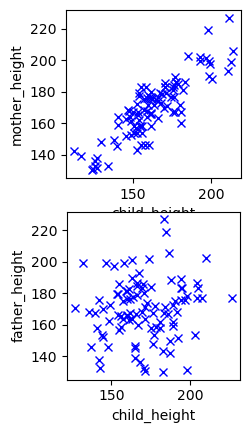

In [41]:
plt.subplot(211, aspect='equal')
plt.xlabel('child_height')
plt.ylabel('mother_height')
plt.plot(mother_height, child_height, 'bx')

plt.subplot(212, aspect='equal')
plt.xlabel('child_height')
plt.ylabel('father_height')
plt.plot(father_height, child_height, 'bx')

plt.show()


2.) Find appropriate $c_{mom}$ and $c_{dad}$

3) Now that you can't really plot the line on top of distribution to check the answer anymore since you have more than 2 dimensions.

Try plot $h_{child, predicted}$ vs $h_{child, data}$. What do you expect to see and did you get what you expect?

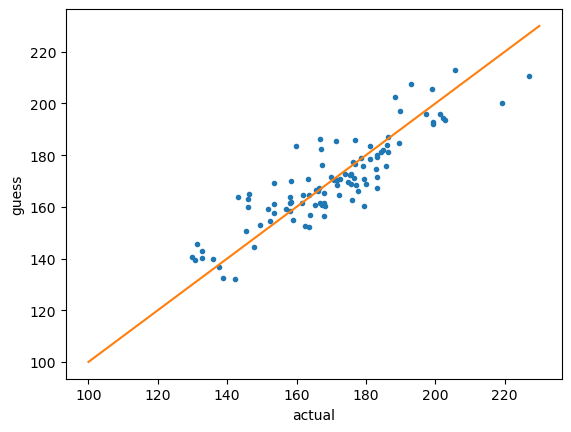

In [42]:

def best_param(m, d, c):
    s = np.sum
    A = np.array([
        [s(m**2), s(d*m), s(m)],
        [s(d*m), s(d**2), s(d)],
        [s(m),   s(d),    len(m)]
    ])
    B = np.array([s(c*m), s(c*d), s(c)])
    return np.linalg.solve(A, B)

cm, cd, h0 = best_param(mother_height, father_height, child_height)

guess = cm*mother_height + cd*father_height + h0

plt.plot(child_height, guess, '.')
plt.xlabel('actual')
plt.ylabel('guess')
xs = np.linspace(100, 230, 100)
plt.plot(xs, xs)

## Even More generalization. Power Law.

Most of physics formula comes in the form of

$Y = K \times A^\alpha B^\beta C^\gamma$

Ex:
- $ F = ma$
- $ K = \frac{1}{2} m v^2$
- $ c = \frac{1}{\sqrt{\mu_0, \epsilon_0}}$

1) How do we turn power law in to linear relation?

2) Turn this in to a linear equation.

3) If we still have time.

Pretend that you are bad at physics and don't know how to calculate kinetic energy from velocity.

Your guess is

$$
K = cv^\alpha
$$

find $c$ and $\alpha$

In [43]:
np.random.seed(7383672)
def gen_kinetic(n_data=100):
    v = np.random.rand(n_data)*10
    m = 3.33
    k = 1/2*m*v**2*(1+np.random.randn(n_data)*0.05)
    v 
    return v, k

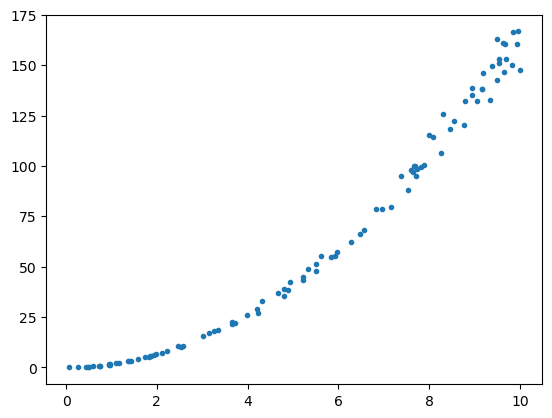

In [44]:
v, k = gen_kinetic()
plt.plot(v, k, '.')